Modules

In [1]:
from linear_regression import linear_regression as ln
from params import params
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

Dataset

In [2]:
df = ln.retrieve_dataset(params.data_path)

In [3]:
# Isolating targets and feature into lists
feature = df[:, 0] # km 
target = df[:, 1] # price

In [4]:
# Normalizing shapes
x = feature.reshape(feature.shape[0], 1)
y = target.reshape(target.shape[0], 1)
nx = np.zeros(len(x), dtype=float).reshape(-1, 1)

In [5]:
# Normalizing values between 0 and 1 (prevents float underflow)
xmin = np.min(x)
xmax = np.max(x)
for i in range(len(x)):
	nx[i] = (x[i] - xmin) / (xmax - xmin)

In [6]:
# Adding bias column to X
X = np.hstack((nx, np.ones(nx.shape)))

In [7]:
# Creating theta vector from random values
theta = np.random.randn(2, 1)

In [8]:
# Defining theta
res = ln.gradient_descent(X, y, theta, lr=params.lr, turns=params.turns)
predictions = ln.model(X, res["theta"])

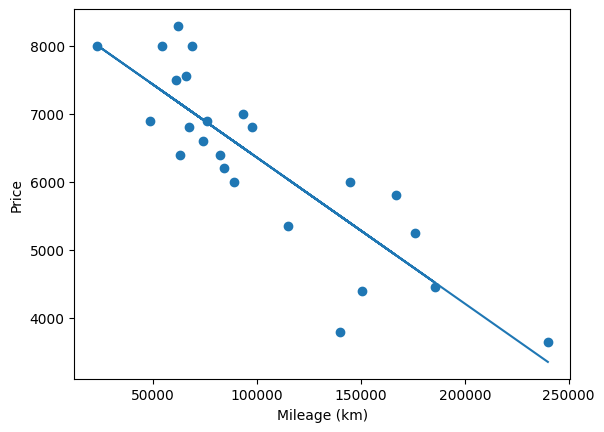

In [9]:
# Plotting linear regression
plt.scatter(feature, y)
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.plot(feature, predictions)
plt.savefig(fname=params.stats_path + "linear_regression")

[5057034.340719812, 2057439.1476327414, 1452415.0288725197, 1296096.8819217377, 1225572.2934495655, 1173072.423927146, 1125862.4566720042, 1081473.42837504, 1039355.0594980642, 999319.2148087291, 961249.4736922067, 925046.7745530447, 890619.0848116884, 857879.2889655769, 826744.6180066066, 797136.374889906, 768979.723444454, 742203.496951818, 716740.0178471627, 692524.9265836616, 669497.0189475102, 647598.091360089, 626772.7937665377, 606968.4897370938, 588135.1234272592, 570225.0930604725, 553193.1306134978, 536996.1874004303, 521593.3252661302, 506945.6131140711, 493016.0285070783, 479769.36409224704, 467172.13861353014, 455192.51228707423, 443800.2063254181, 432966.42640714394, 422663.78989855293, 412866.2566434133, 403549.0631458533, 394688.659980043, 386262.6522684651, 378249.7430783361, 370629.679593107, 363383.201922993, 356491.9944251484, 349938.63941044913, 343706.5731198727, 337780.04385920794, 332144.07218627736, 326784.4130500437, 321687.51978590945, 316840.50987620227, 312

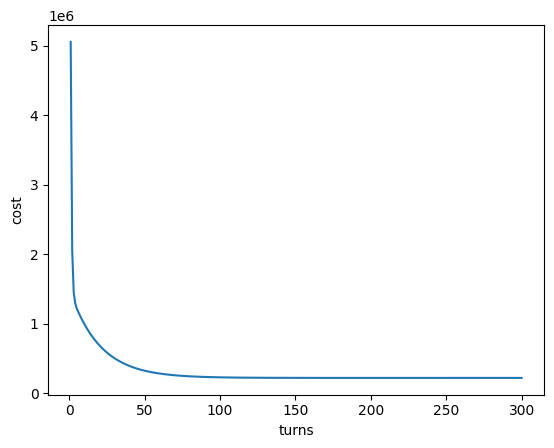

In [29]:
# Plotting cost function results
print(res["costs"])
plt.plot(range(1, len(res["costs"]) + 1) ,res["costs"])
plt.xlabel("turns")
plt.ylabel("cost")
plt.savefig(fname=params.stats_path + "cost_function_res")
plt.show()

In [ ]:
# Write down the new theta in params.py
with open("/home/lu/Coding/ft_linear_regression_git/srcs/params/params.py", "r") as f:
    content = f.read()
    if str(res['theta'][1]) not in content and str(res['theta'][0]) not in content:
        with open("/home/lu/Coding/ft_linear_regression_git/srcs/params/params.py", "a") as f:
            f.write(f"theta0 = {res['theta'][1]}\n")
            f.write(f"theta1 = {res['theta'][0]}\n")
